In [1]:
suppressMessages(library(tidyverse))
library(ggrepel)

In [2]:
df <- readr::read_tsv("data/Stats.TECAN.AL002_vs_isotype.txt")

Rows: 13891 Columns: 9
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): geneID, gene
dbl (7): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj, PercentDetecte...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
df <- df[df$PercentDetectedSamples > 0.9,]

In [5]:
# Add a new column to identify significant genes
df$Significant <- ifelse((df$padj < 0.1) & (abs(df$log2FoldChange) > 0), "red", "black")

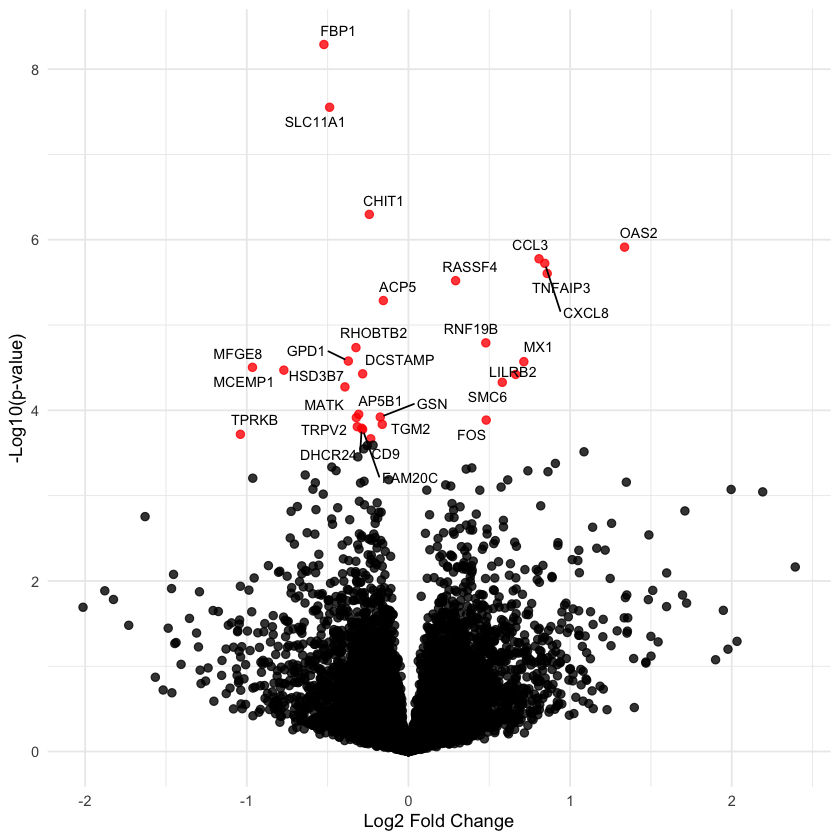

In [6]:
# Create the volcano plot with -log10(padj)
fig <- ggplot(df, aes(x = log2FoldChange, y = -log10(pvalue))) +
  geom_point(aes(color = Significant), alpha = 0.8, size = 2) +  # Add points with color based on significance
  scale_color_manual(values = c("red" = "red", "black" = "black")) +  # Set color manually
  geom_text_repel(
    data = subset(df, (padj < 0.1) & abs(log2FoldChange) > 0), 
    aes(label = gene), 
    size = 3, 
    box.padding = 0.3, 
    point.padding = 0.2,
    max.overlaps = Inf
  ) +  # Add gene names to significant points
  theme_minimal() +  # Use a minimal theme
  labs(
    x = "Log2 Fold Change", 
    y = "-Log10(p-value)", 
  ) +  # Label axes and title
  theme(
    legend.position = "none"
  )  # Remove legend

fig

In [7]:
ggsave(fig, file="fig4a.pdf", width=5, height=5)

In [12]:
kegg <- readr::read_tsv("KEGG_AL002.tsv")
context <- readr::read_tsv("with_context_AL002.tsv")
no_context <- readr::read_tsv("no_context_AL002.tsv")

Rows: 320 Columns: 12
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): set_descr, intersection, set_genes
dbl (9): generatio, bgratio, richFactor, foldEnrich, p_val, p_adj, ngenes, n...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 96 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): set_descr, intersection, set_genes
dbl (11): generatio, bgratio, richFactor, foldEnrich, p_val, p_adj, ngenes, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 93 Columns: 14
── Column specificati

In [13]:
kegg

set_descr,generatio,bgratio,richFactor,foldEnrich,p_val,p_adj,intersection,set_genes,ngenes,nset,ninter
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Rheumatoid arthritis,0.13793103,0.0046860828,0.043010753,29.434186,9.866896e-06,0.003157407,"ACP5,FOS,CCL3,CXCL8","ATP6V1C1,CD86,CSF1,ATP6V1H,HLA-DPA1,CTLA4,LTB,MMP3,CXCL5,JUN,MMP1,TGFB3,TNFSF13B,CCL2,CCL3,HLA-DPB1,FLT1,HLA-DRB5,ATP6V1G3,TCIRG1,CXCL1,TGFB2,ATP6V0D1,ATP6V0B,ATP6V1D,ITGAL,HLA-DQA1,CTSK,CSF2,ATP6V0A2,CD28,IL17A,HLA-DMB,HLA-DOA,ATP6V1E2,IL6,IL23A,ATP6V1B2,CD80,CTSL,CCL3L3,TLR2,CXCL6,IL1B,IL1A,IFNG,ATP6V0A4,CXCL12,HLA-DRB1,IL11,ATP6V0D2,FOS,HLA-DRB3,ITGB2,TLR4,ATP6V1F,ATP6V1E1,ACP5,TNFSF13,CCL5,TEK,IL15,HLA-DQB1,ATP6V1A,ATP6V1B1,TGFB1,CCL20,PTH,CXCL2,ANGPT1,HLA-DOB,TNFSF11,ATP6AP1,CCL3L1,HLA-DQA2,HLA-DRA,HLA-DMA,ATP6V0A1,IL18,ICAM1,TNF,IGH,HLA-DRB4,ATP6V0C,VEGFA,ATP6V1G1,CXCL3,CXCL8,ATP6V1C2,ATP6V0E1,TNFRSF11A,ATP6V1G2,ATP6V0E2",29,93,4
Measles,0.13793103,0.0070039303,0.028776978,19.693376,4.804021e-05,0.007686434,"FOS,TNFAIP3,MX1,OAS2","IL2RA,TP73,IFNA10,BCL2L1,EIF2AK2,AKT1,OAS3,IRF3,AKT3,CHUK,CD46,TLR7,PIK3CA,CASP9,RAB9A,JUN,PIK3CB,TRAF3,IL12A,HSPA2,IRF9,EIF2AK4,CSNK2A2,MX2,IFNA2,IFNA13,CCND3,IKBKG,ADAR,IFNA16,BAD,EIF3H,MAVS,TAB2,NFKBIA,HSPA1B,JAK3,BAK1,STAT3,IFNA17,IFNA14,TRAF6,AKT2,IFNA8,CASP3,CD28,TP53,EIF2AK1,CSNK2B,GSK3B,EIF2AK3,MYD88,IL2,IL6,STAT1,TLR2,IL1B,NFKBIB,CD209,IKBKE,CYCS,IL1A,HSPA8,HSPA6,IFNA4,CCNE1,FOS,CD3G,OAS1,IFNA7,IKBKB,TLR4,CCND1,CD3E,STAT5B,IRAK4,TRADD,RAB9B,TLR9,IFNAR1,RACK1,CDK2,MAPK9,RELA,MAPK8,TBK1,CSNK2A3,TNFAIP3,IL2RB,HSPA1L,FAS,MSN,IFIH1,CLEC4M,CDK6,IFNA6,TYK2,STAT2,MAP3K7,IFNB1,IFNA5,NFKB1,PIK3R1,FCGR2B,APAF1,IFNAR2,RCHY1,FASLG,CCNE2,FADD,CSNK2A1,PIK3R2,BCL2,CCND2,IL12B,MAPK10,JAK1,MX1,IFNA1,BID,EIF2S1,CBLB,IFNA21,BAX,DDX58,STAT5A,PIK3CD,CASP8,CDK4,IL2RG,HSPA1A,PIK3R3,CD3D,BBC3,CDKN1B,IRAK1,OAS2,SLAMF1,IRF7",29,139,4
NOD-like receptor signaling pathway,0.13793103,0.0091202257,0.022099448,15.123643,1.337388e-04,0.014265468,"TRPV2,OAS2,TNFAIP3,CXCL8","RNASEL,CASR,PLCB4,DEFA4,RIPK3,TRPM7,VDAC2,IFNA10,XIAP,BCL2L1,DEFA1B,RIPK2,ITPR1,OAS3,GBP7,NAMPT,IRF3,RNF31,ATG16L1,CASP12,CHUK,GABARAPL2,GSDMD,JUN,PYDC2,TRAF3,CCL2,GBP5,GABARAPL1,DEFB103B,TANK,IRF9,HSP90AB1,IFNA2,NLRX1,IFNA13,DEFA3,PANX1,IKBKG,NLRP3,IFNA16,MAPK14,NLRP6,ATG5,PKN2,NAIP,TRIP6,MAVS,TAB2,MEFV,NFKBIA,CXCL1,BRCC3,TAB1,CARD8,IFNA17,MAPK3,AIM2,IFNA14,NLRC4,TRAF6,CARD16,CASP4,IFNA8,TAB3,MAPK11,MYD88,IL6,DNM1L,ITPR3,STAT1,STING1,CARD6,TRAF5,GABARAP,TRPM2,GBP1,IL1B,NFKBIB,DEFA5,IKBKE,CARD17,RIPK1,P2RX7,NEK7,PYDC5,TP53BP1,PKN1,IFNA4,NOD1,IFNA7,OAS1,IKBKB,TRAF2,TLR4,CARD9,GPRC6A,BIRC3,IRAK4,IFNAR1,DEFB4B,NLRP12,MAPK9,MCU,GBP3,RBCK1,RELA,MAPK8,TBK1,GBP4,NOD2,TRPV2,TNFAIP3,CCL5,CASP5,YWHAE,ITPR2,TXN,PRKCD,SHARPIN,PLCB1,CXCL2,TXNIP,MAPK12,VDAC3,SUGT1,NLRP7,PLCB3,MFN2,IFNA6,CYBA,ANTXR1,TYK2,PLCB2,STAT2,NLRP1,ATG12,ANTXR2,MAP3K7,CTSB,IFNA5,IFNB1,NFKB1,MFN1,HSP90AA1,IFNAR2,MAPK13,BIRC2,VDAC1,PYDC1,IL18,DEFA6,OAS2,FADD,TNF,TXN2,BCL2,CYBB,PYCARD,MAPK10,DHX33,PSTPIP1,JAK1,TICAM1,ERBIN,CAMP,IFNA1,CXCL3,IFNA21,DEFA1,CXCL8,CASP8,IFI16,CASP1,DEFB103A,MAPK1,GBP2,RHOA,DEFB4A,IRF7,CARD18",29,181,4
IL-17 signaling pathway,0.10344828,0.0047364708,0.031914894,21.840792,3.453434e-04,0.021237813,"FOS,TNFAIP3,CXCL8","IL5,IL17RA,MMP3,CHUK,CXCL5,MMP13,JUN,MMP1,TRAF3,CCL2,HSP90AB1,IKBKG,IL17B,IL13,MAPK14,IL17RC,CXCL1,TAB2,NFKBIA,IL4,PTGS2,CSF3,MAPK3,S100A7,TRAF6,CSF2,IL17RE,ELAVL1,CASP3,CCL7,TAB3,GSK3B,MAPK11,IL17A,IL6,CCL11,TRAF5,CXCL6,TRAF4,FOSL1,IL1B,MAPK4,IKBKE,IFNG,IL17D,IL17C,MUC5B,IL17RB,FOS,IKBKB,TRAF2,MAPK7,TRADD,DEFB4B,CEBPB,MAPK9,RELA,MAPK8,TBK1,TNFAIP3,IL25,S100A8,MAPK15,CCL20,CXCL2,IL17F,MUC5AC,MAPK12,MMP9,MAP3K7,NFKB1,HSP90AA1,MAPK13,FADD,USP25,LCN2,TNF,CXCL10,MAPK10,JUND,S100A9,ANAPC5,CXCL3,CXCL8,CASP8,FOSB,TRAF3IP2,S100A7A,SRSF1,MAPK1,MAPK6,CCL17,DEFB4A,HSP90B1",29,94,3
Coronavirus disease,0.13793103,0.0116900131,0.017241379,11.799049,3.454094e-04,0.021237813,"FOS,OAS2,MX1,CXCL8","RPL37A,CGAS,IFNA10,RPS13,RPL22,RPL19,RPL8,RPS9,RPS26,C2,RPL11,RPLP0,FAU,EIF2AK2,RPL30,RPLP1